In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(0)

x =2-3*np.random.normal(0,1,20)
y = x - 2*(x**2) + 0.5 * (x**3)+np.random.normal(-3,3,20)

In [3]:
y


array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
        -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
         -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
         -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
        -21.76152272,   -1.51295226,   -4.75491157,    6.50723268])

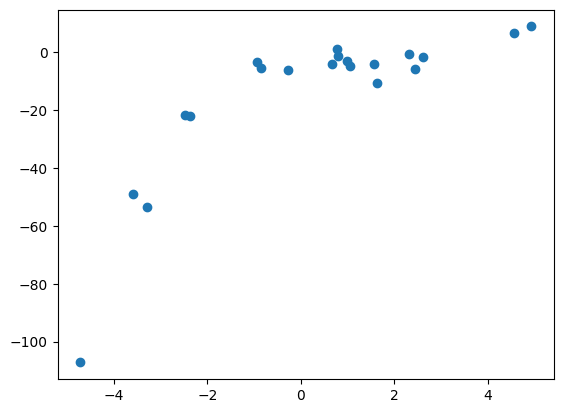

In [4]:
plt.scatter(x,y)



In [5]:

x= x.reshape(-1,1)
y=y.reshape(-1,1)

model =LinearRegression()
model.fit(x,y)

y_pred= model.predict(x)

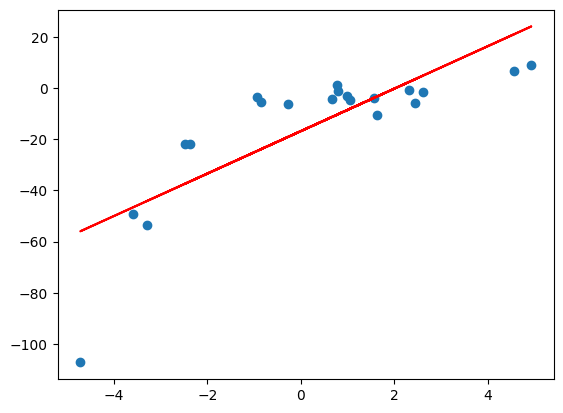

In [6]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")
plt.show()

In [7]:
#poly example

arr=np.array([1,2,3,4]).reshape(-1,1)

In [8]:
arr

array([[1],
       [2],
       [3],
       [4]])

In [9]:
poly_features=PolynomialFeatures(degree=3)
new_arr= poly_features.fit_transform(arr)

In [10]:
new_arr

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [11]:
poly_features.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [12]:
# lets apply polynomial regression

poly_features = PolynomialFeatures(degree=3)
 
 
x_poly= poly_features.fit_transform(x)
pr_model=LinearRegression()
pr_model.fit(x_poly,y)
pr_y_pred=pr_model.predict(x_poly)

In [13]:
sort_index = x.flatten().argsort()
x_sorted = x.flatten()[sort_index]

pr_y_pred_sorted = pr_y_pred[sort_index]


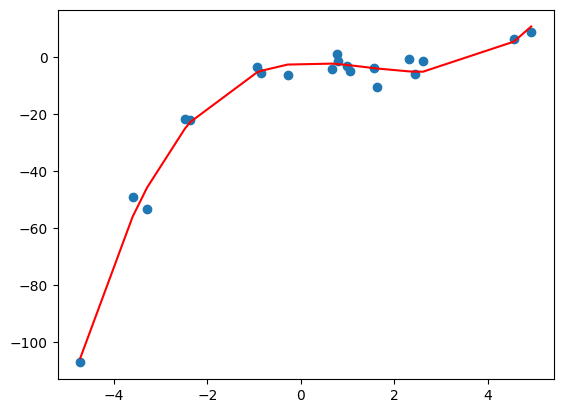

In [14]:
plt.scatter(x,y)
plt.plot(x_sorted,pr_y_pred_sorted,color='red')

In [15]:
n= 1000
x1=np.random.randint(1,10,n)
x2=np.linspace(0,.5,n)


y= np.sin(x1)+np.cos(x2)
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df
                  

,x1,x2,y
0,4,0.000000,0.243198
1,6,0.000501,0.720584
2,5,0.001001,0.041075
3,5,0.001502,0.041075
4,7,0.002002,1.656985
...,...,...,...
995,4,0.497998,0.121738
996,9,0.498498,1.290420
997,3,0.498999,1.019182
998,5,0.499499,-0.081102


In [16]:
# lr model

model= LinearRegression()

model.fit(df[['x1','x2']],df['y'])



LinearRegression()

In [17]:
X=df[['x1','x2']]
df['y_pred']=model.predict(X)

In [18]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure(data=[go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y'], mode = "markers", name = "Actual", marker= dict(size =3))])
fig.add_trace(go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y_pred'], mode = "markers", name = "Actual", marker= dict(size =3)))

fig.show()


In [26]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(df[['x1','x2']])

p_model = LinearRegression()
p_model.fit(x_poly, df['y'])


LinearRegression()

In [28]:

df['p_y_pred'] = p_model.predict(x_poly)

fig = go.Figure(data=[go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y'], mode = "markers", name = "Actual", marker= dict(size =3))])
fig.add_trace(go.Scatter3d(x= df['x1'], y = df['x2'], z = df['p_y_pred'], mode = "markers", name = "Actual", marker= dict(size =3)))

fig.show()

Metrics

In [30]:
df

,x1,x2,y,y_pred,p_y_pred
0,4,0.000000,0.243198,1.147403,0.456459
1,6,0.000501,0.720584,1.144470,0.734836
2,5,0.001001,0.041075,1.145924,0.511900
3,5,0.001502,0.041075,1.145915,0.512633
4,7,0.002002,1.656985,1.142983,1.047189
...,...,...,...,...,...
995,4,0.497998,0.121738,1.138938,0.439664
996,9,0.498498,1.290420,1.131618,1.727102
997,3,0.498999,1.019182,1.140383,0.641970
998,5,0.499499,-0.081102,1.137450,0.501615


In [34]:
#for linear regresssion

from sklearn.metrics import mean_absolute_error

print("MAE OF LR : - " ,mean_absolute_error(df['y'],df['y_pred']))


MAE OF LR : -  0.6201735738549271


In [36]:
from sklearn.metrics import mean_squared_error

print('MSE OF LR :- ' , mean_squared_error(df['y'],df['y_pred']))

MSE OF LR :-  0.4902577512042408


In [38]:
#RMSE
print('RMSE OF LR :- ' , np.sqrt(mean_squared_error(df['y'],df['y_pred'])))


RMSE OF LR :-  0.70018408379814


In [39]:
#R2

from sklearn.metrics import r2_score

print("R2 squared := " , r2_score(df['y'],df['y_pred']))

R2 squared :=  3.856106450483843e-05


In [43]:
print("MAE OF LR : - " ,mean_absolute_error(df['y'],df['y_pred']))

print('MSE OF LR :- ' , mean_squared_error(df['y'],df['y_pred']))
print('RMSE OF LR :- ' , np.sqrt(mean_squared_error(df['y'],df['y_pred'])))
print("R2 squared := " , r2_score(df['y'],df['y_pred']))

MAE OF LR : -  0.6201735738549271
MSE OF LR :-  0.4902577512042408
RMSE OF LR :-  0.70018408379814
R2 squared :=  3.856106450483843e-05


In [44]:
#for polynomial regression

print("MAE OF LR : - " ,mean_absolute_error(df['y'],df['p_y_pred']))

print('MSE OF LR :- ' , mean_squared_error(df['y'],df['p_y_pred']))
print('RMSE OF LR :- ' , np.sqrt(mean_squared_error(df['y'],df['p_y_pred'])))
print("R2 squared := " , r2_score(df['y'],df['p_y_pred']))

MAE OF LR : -  0.4104527996901071
MSE OF LR :-  0.1880136991763478
RMSE OF LR :-  0.4336054648829369
R2 squared :=  0.6165150908758548
